In [1]:
import pandas as pd
data = pd.read_excel('../data/경기신보/파산 데이터 틀.xlsx')

# 강릉 지원은 회생(개인) 데이터에만 있는 값이라 합의, 단독 컬럼에서 nan값이 됨
data.fillna(0, inplace=True)

# 법원 이름을 지역 이름으로 바꾸기
data['법원'] = data['법원'].str.replace('회생법원', '', regex=False)
data['법원'] = data['법원'].str.replace('지방법원', '', regex=False)
data['법원'] = data['법원'].str.replace('지원', '', regex=False)

# 의정부 + 수원 -> 경기
gyeonggi = data[data['법원'].isin(['의정부', '수원'])].sum(numeric_only=True)
new_gyeonggi = {
    '법원': '경기',
    '2023_법인': gyeonggi['2023_법인'],
    '2023_개인': gyeonggi['2023_개인'],
    '2022_법인': gyeonggi['2022_법인'],
    '2022_개인': gyeonggi['2022_개인'],
}
new_gyeonggi = pd.DataFrame([new_gyeonggi])

# 춘천 + 강릉 -> 강원
gangwon = data[data['법원'].isin(['춘천', '강릉'])].sum(numeric_only=True)
new_gangwon = {
    '법원': '강원',
    '2023_법인': gangwon['2023_법인'],
    '2023_개인': gangwon['2023_개인'],
    '2022_법인': gangwon['2022_법인'],
    '2022_개인': gangwon['2022_개인'],
}
new_gangwon = pd.DataFrame([new_gangwon])

data = pd.concat([data, new_gyeonggi, new_gangwon], ignore_index=True)

data = data[~data['법원'].isin(['의정부', '수원', '춘천', '강릉'])]
data

# 총합 컬럼 만듦
data['2023_파산(총합)'] = data['2023_법인'] + data['2023_개인']
data['2022_파산(총합)'] = data['2022_법인'] + data['2022_개인']

data

## 엑셀 파일로 저장
data.to_csv("../data/경기신보/년도별파산.csv", encoding="utf-8-sig", index=False)

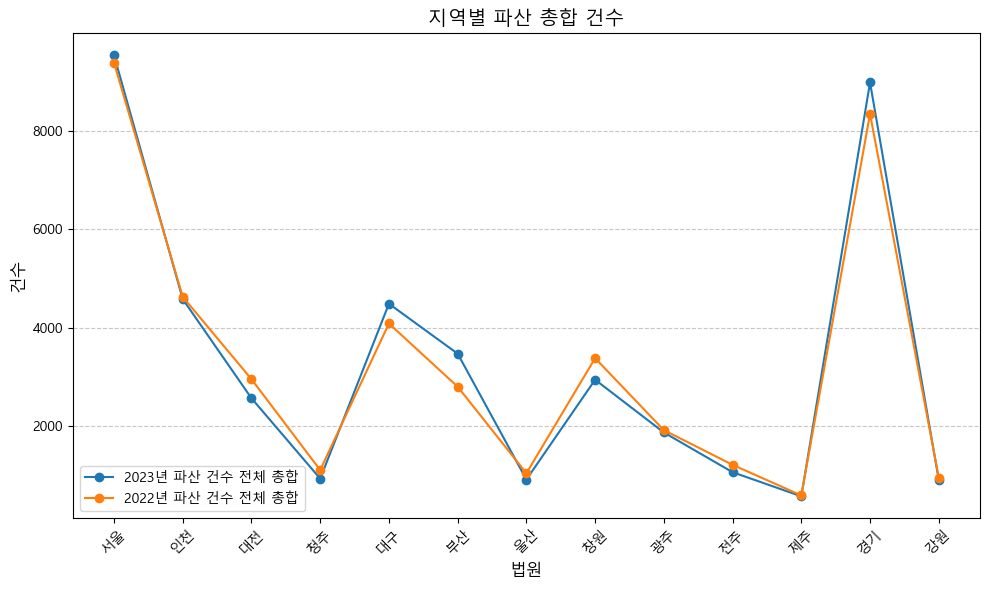

In [14]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(10, 6))

data1 = data[data['법원'] != '합계']

plt.plot(data1['법원'], data1['2023_파산(총합)'], marker='o', label='2023년 파산 건수 전체 총합')
plt.plot(data1['법원'], data1['2022_파산(총합)'], marker='o', label='2022년 파산 건수 전체 총합')

plt.title('지역별 파산 총합 건수', fontsize=14)
plt.xlabel('법원', fontsize=12)
plt.ylabel('건수', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Display the plot
plt.tight_layout()
plt.show()

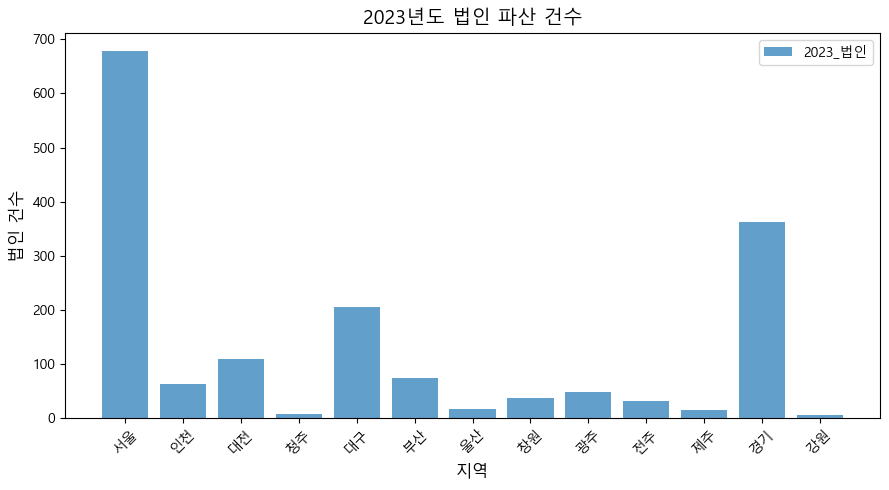

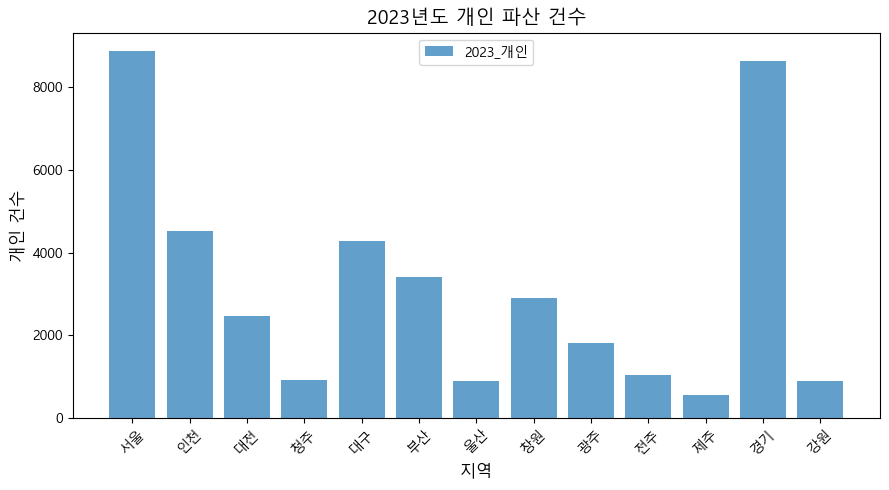

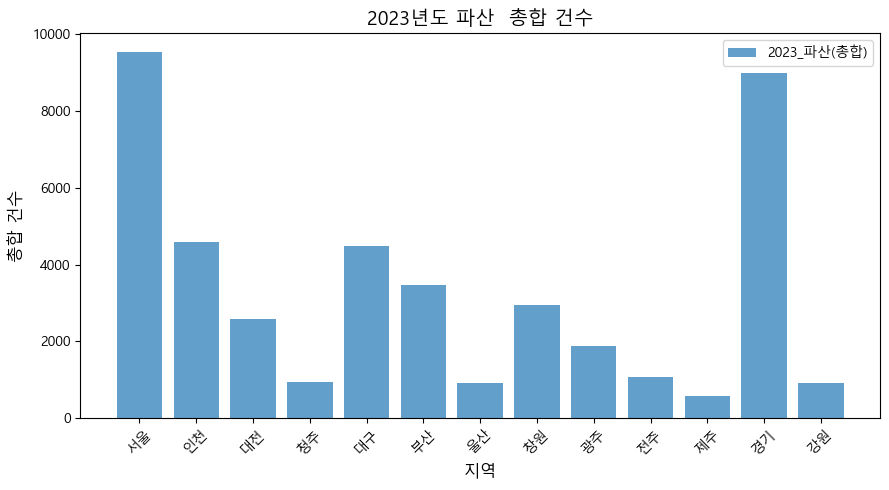

In [ ]:
import matplotlib.pyplot as plt

# 데이터 준비
categories = ['2023_법인', '2023_개인', '2023_파산(총합)']
titles = ['2023년도 법인 파산 건수', '2023년도 개인 파산 건수','2023년도 파산 총합 건수' ]
y_labels = ['법인 건수', '개인 건수', '총합 건수']

# 각 카테고리에 대해 막대그래프 생성
for category, title, ylabel in zip(categories, titles, y_labels):
    plt.figure(figsize=(9, 5))
    plt.bar(data1['법원'], data1[category], alpha=0.7, label=category)
    plt.xlabel('지역', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=14)
    plt.xticks(rotation=45, fontsize=10)
    plt.legend()
    plt.tight_layout()
    plt.show()